<a href="https://colab.research.google.com/github/SarahFSBorges/data.science/blob/main/Linear_Regression_vs_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression vs Logistic Regression**

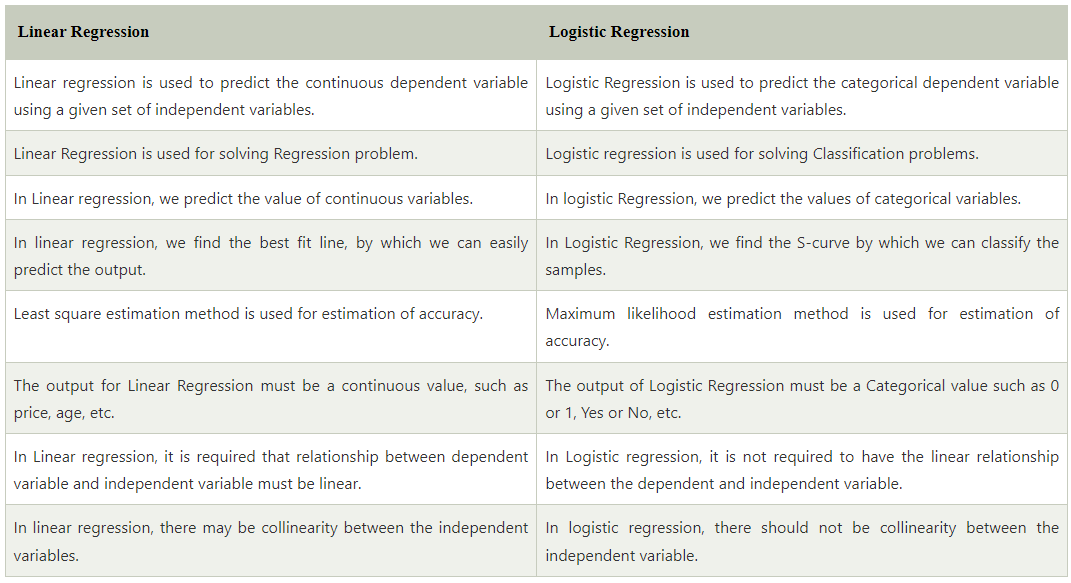

#### See: https://www.javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning

## **Linear Regression**


Verificar qual o preço colocar em uma casa localizada no estado americano de Iowa. Dataset conta com 79 variáveis relativas à imóveis de Ames, e está disponível para download no Kaggle. 

In [18]:
# importar pacotes
import pandas as pd
import matplotlib.pyplot as plt

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/g8cgvjiorjbz54p/precificacao_housing.csv?dl=0")

# ver as primeiras entradas
df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


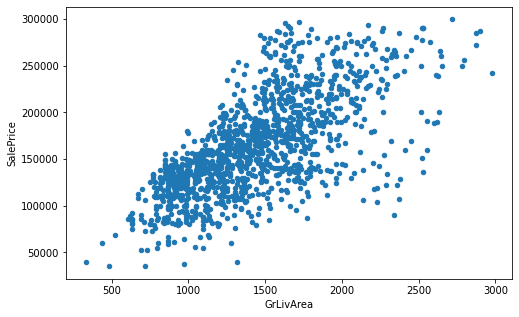

In [25]:
# plotar gráfico de dispersãp.
fig, ax = plt.subplots(figsize=(8,5))
df.plot.scatter(x='GrLivArea', y='SalePrice', ax=ax)
plt.show()

In [24]:
# importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [31]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector
X = df['GrLivArea'].values.reshape(-1,1)
y = df['SalePrice']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# imprimir os coeficientes
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [82.52243988]
Intercepto:	 45076.218903627305


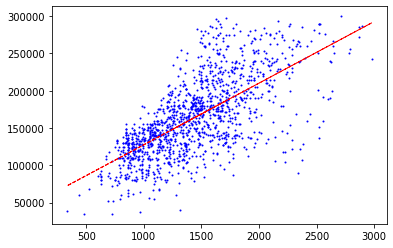

In [33]:
# plotar reta e dados
fig, ax = plt.subplots()
ax.scatter(X, y, s=1, color='blue')
ax.plot(X, (model.coef_ * X + model.intercept_), '--r', linewidth=1)

In [35]:
# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

In [36]:
# avaliar o desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.42010984859031175
MAE:		 29091.849754265073
MSE:		 1524474030.343582


*   R-Squared - métrica popularmente usada para calcular a acurácia do seu modelo. Basicamente, calcula como o seu modelo se encaixa aos seus dados, quantificando a qualidade entre 0 e 1. No caso, a melhor pontuação que seu modelo pode atingir é 1.

*   Mean Absolut Error (MAE) - é a média absoluta do erro, representada pela média das somas dos erros individuais (distâncias entre pontos e retas).

*   Mean Squared Error (MSE) - é a média dos quadrados dos error e provavelmente a métrica mais conhecida. Tende a penalizar exponencialmente os erros, tratando diferentemente erros pequenos e grandes.

## **Multiple linear regression**

O raciocínio usado na Regressão Linear Múltipla é exatamente o mesmo da Regressão linear simples (anterior). A diferença é que temos mais variáveis independentes para considerar no nosso modelo.

Será utilizado o dataset anterior, porém com mais dados. Teremos 1460 entradas, mas temos agora 34 features. 

In [39]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/gc1rm540g4i670n/precificacao_housing_plus.csv?dl=1")

# ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.drop('Id', axis=1, inplace=True)
df.head()

Tamanho de df: (1460, 35)



,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [41]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector - mas atenção com 1-feature (reshape)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

In [42]:
print("df:\t\t",df.shape)

print("X:\t\t",X.shape)

print("y:\t\t", y.shape)

df:		 (1460, 34)
X:		 (1460, 33)
y:		 (1460,)


In [44]:
# imprimir os coeficientes
# Se na Regressão Linear Simples tínhamos apenas um coeficiente e um intercepto, agora temos um coeficiente para cada variável. 
# Para obtermos os coeficientes de regressão e o intercept, podemos acessar os atributos do modelo diretamente da variável ml_model.
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [-1.77071674e+02  3.61053622e-01  1.75849426e+04  3.58499144e+03
  3.70644081e+02  1.36483310e+02  1.01895067e+01 -7.71175971e+00
  2.86436199e+00  5.34210896e+00  1.80281234e+01  2.01678996e+01
 -1.19410394e+01  2.62549836e+01  1.18056609e+04  4.79845047e+02
  4.92462026e+03 -2.18039626e+03 -1.08846630e+04 -1.14774089e+04
  6.20864915e+03  3.80198809e+03  1.16022071e+04  5.12001454e-01
  3.35307243e+01 -1.07060354e+01  1.84379135e+01  2.96979173e+01
  6.95570598e+01 -2.66156191e+01 -4.49471543e-01  2.12207967e+02
 -6.93680039e+02]
Intercepto:	 334311.4140030353


In [45]:
# verificar desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.812375681833003
MAE:		 21694.233081191902
MSE:		 1127832078.9467201


Observe que todas as métricas avaliadas tiveram uma melhora significativa. Uma vez que o modelo tinha à disposição mais features para treinar, tornando-se mais preciso.

## **Logistic Regression**

Verificar se uma pessoa tem doença cardiovascular ou não.
1 = sim,
0 = não

In [16]:
# importar pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurar notebook
sns.set_style()

# importar arquivp
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=")

# ver primeiras 5 entradas
print("Tamanho de df {}\n".format(df.shape))

df.head()

Tamanho de df (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
# importar scikit-learn para criar modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
# 1. escolher e importar modelo
from sklearn.linear_model import LogisticRegression

# 2. Instalar e escolher hyperparameters
model = LogisticRegression()

# 3. Separar dados entre feature matrix e target vector
X = df.drop('num', axis=1)
y = df['num']

# 3.1 Dividir dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 3.2 Padronizar dados de treino
scaler = StandardScaler().fit(X_train) # fit grava as condições do modelo
X_train = scaler.transform(X_train)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train) # trabalhando o dataset de treino

# 5. Fazer previsões dos dados
X_test = scaler.transform(X_test) # padronizar dados de teste
y_pred = model.predict(X_test)

In [4]:
# imprimir relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        43
           1       0.83      0.73      0.77        33

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



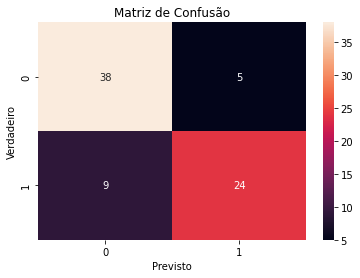

In [17]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

*   Verdadeiro positivo (true positive — TP): Por exemplo, quando o paciente tem doença cardiovascular e o modelo classifica como tendo doença vascular.

*   Falso positivo (false positive — FP): Por exemplo, quando o paciente não tem doença cardiovascular e o modelo classifica como tendo doença vascular.

*   Falso verdadeiro (true negative — TN): Por exemplo, quando o paciente tem doença cardiovascular e o modelo classifica como não tendo doença vascular.

*   Verdadeiro negativo (false negative — FN): Por exemplo, quando o paciente não tem doença cardiovascular e o modelo classifica como não tendo doença vascular.